## Building a Robot Judge
### 2. Machine Learning Essentials

In [1]:
# set up
import warnings; warnings.simplefilter('ignore')
%matplotlib notebook
import pandas as pd
df1 = pd.read_csv('death-penalty-cases.csv')

In [2]:
# Pandas Data-frames
# open dataset
import pandas as pd
df1 = pd.read_csv('death-penalty-cases.csv')
df1.head() # show top few lines of data

,court_id,author_id,state,year,dateFiled,citeCount,snippet
0,nj,NaN,NJ,1965,1965-09-14T00:00:00Z,8,N.J. ( )\n A. d \nIN RE WAIVER OF DEATH PE...
1,fla,4019.0,FL,1973,1973-07-26T00:00:00Z,552,"whether the death penalty is, per se, unconsti..."
2,texcrimapp,5765.0,TX,1975,1975-04-16T00:00:00Z,143,# ;s contention that the assessment of the dea...
3,nm,NaN,NM,2009,2009-11-30T00:00:00Z,0,. d ( )\n -NMSC- \nIN THE MATTER OF DEATH PE...
4,texcrimapp,5758.0,TX,1944,1944-12-20T00:00:00Z,56,assume the district attorney orally waived the...


In [3]:
df1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32567 entries, 0 to 32566
Data columns (total 7 columns):
court_id     32567 non-null object
author_id    18215 non-null float64
state        32567 non-null object
year         32567 non-null int64
dateFiled    32567 non-null object
citeCount    32567 non-null int64
snippet      32567 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 1.7+ MB


In [4]:
df1['court_id'].value_counts()

texapp             2577
texcrimapp         2380
fla                1927
cal                1310
ga                 1104
illappct           1077
pa                  930
miss                925
ill                 895
oklacrimapp         760
nc                  731
tenncrimapp         723
calctapp            723
alacrimapp          711
ohioctapp           611
ariz                552
wva                 545
ind                 515
la                  512
mo                  507
ark                 459
nysd                390
ala                 379
tenn                368
fladistctapp        359
nyed                325
sc                  323
nev                 294
pasuperct           291
wash                272
                   ... 
mtd                   7
wyd                   6
connsuperct           6
akd                   6
lamd                  6
vid                   5
oked                  5
oklaag                5
wiwd                  4
ilsd                  4
laag            

<IPython.core.display.Javascript object>


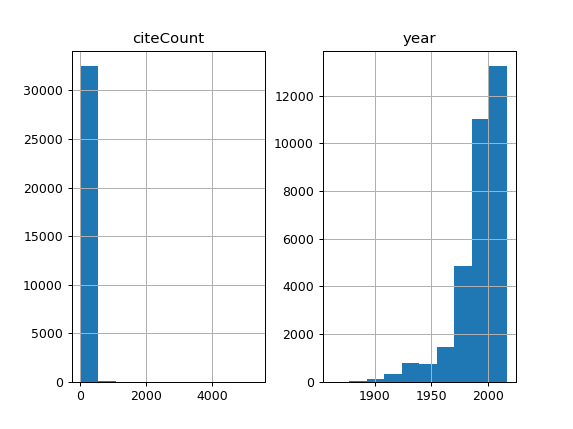

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd8e6b3da58>,
      dtype=object)

In [23]:
df1[['year','citeCount']].hist()

In [6]:
# our first dataset
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english',
                             max_features=4)
X = vectorizer.fit_transform(df1['snippet'])
words = vectorizer.get_feature_names()
print(words)
X

['court', 'death', 'penalty', 'quot']


<32567x4 sparse matrix of type '<class 'numpy.int64'>'
	with 82110 stored elements in Compressed Sparse Row format>

In [7]:
X = X.todense()
X = X / X.sum(axis=1) # counts to frequencies
for i, word in enumerate(words):
    column = X[:,i]
    df1['x_'+word] = column
df1.head()

,court_id,author_id,state,year,dateFiled,citeCount,snippet,x_court,x_death,x_penalty,x_quot
0,nj,NaN,NJ,1965,1965-09-14T00:00:00Z,8,N.J. ( )\n A. d \nIN RE WAIVER OF DEATH PE...,0.230769,0.384615,0.384615,0.000000
1,fla,4019.0,FL,1973,1973-07-26T00:00:00Z,552,"whether the death penalty is, per se, unconsti...",0.000000,0.473684,0.473684,0.052632
2,texcrimapp,5765.0,TX,1975,1975-04-16T00:00:00Z,143,# ;s contention that the assessment of the dea...,0.000000,0.454545,0.545455,0.000000
3,nm,NaN,NM,2009,2009-11-30T00:00:00Z,0,. d ( )\n -NMSC- \nIN THE MATTER OF DEATH PE...,0.000000,0.500000,0.500000,0.000000
4,texcrimapp,5758.0,TX,1944,1944-12-20T00:00:00Z,56,assume the district attorney orally waived the...,0.000000,0.428571,0.428571,0.142857


In [8]:
# inspecting data
import numpy as np
df1['logcites'] = np.log(1+df1['citeCount'])
features = ['x_'+x for x in words]
cites_features = ['logcites'] + features
df2 = df1[cites_features]
corr_matrix = df2.corr()
corr_matrix['logcites'].sort_values(ascending=False)

logcites     1.000000
x_death      0.041527
x_penalty    0.019063
x_court     -0.004189
x_quot      -0.034363
Name: logcites, dtype: float64

<IPython.core.display.Javascript object>


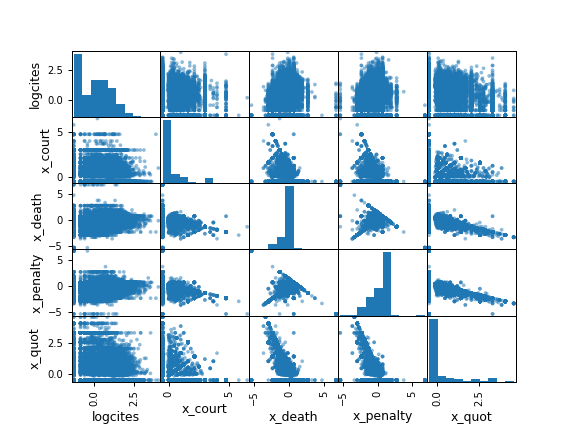

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd8e4f98e48>,
      dtype=object)

In [24]:
from pandas.plotting import scatter_matrix
scatter_matrix(df2)

<IPython.core.display.Javascript object>


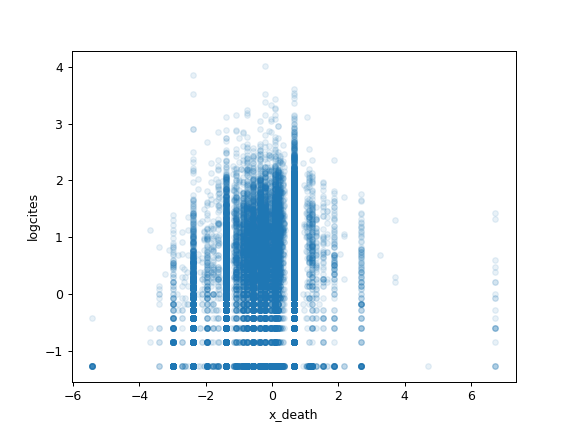

In [25]:
df2.plot(kind='scatter', x='x_death', y='logcites', alpha = 0.1)

In [11]:
# create a test set 
from sklearn.model_selection import train_test_split
train, test = train_test_split(df2, test_size=0.2)

In [12]:
# our first machine learning model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
Xtrain = train[features]
Ytrain = train['logcites']
lin_reg.fit(Xtrain, Ytrain)
lin_reg.coef_ 

array([-1.32660331e+13, -1.32660331e+13, -1.32660331e+13, -1.32660331e+13])

In [13]:
# in-sample performance
from sklearn.metrics import mean_squared_error
Ytrain_pred = lin_reg.predict(Xtrain)        
train_mse = mean_squared_error(Ytrain,Ytrain_pred)
train_mse

2.6357021175463897

In [14]:
# out-of-sample performance
Xtest = test[features]
Ytest = test['logcites']
Ytest_pred = lin_reg.predict(Xtest)        
test_mse = mean_squared_error(Ytest,Ytest_pred)
test_mse

2.643741087287053

# Pipelines and Cross-Validation

In [15]:
# missing values
df1['author_id'].fillna(0,inplace=True)

In [16]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df2)
df2 = pd.DataFrame(X,columns=df2.columns)

In [18]:
# Encoding categorical variables
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
judge = df1['author_id']
judge_fes = encoder.fit_transform(judge.values.reshape(-1,1))
judge_ids = ['j_'+str(x) for x in range(len(judge.unique()))]
judge_fes = pd.DataFrame(judge_fes.todense(),columns=judge_ids)
df1 = pd.concat([df1,judge_fes],axis=1)
train, test = train_test_split(df1, test_size=0.2)
df1['anycites'] = df1['citeCount'] > 0

In [19]:
# Cross-validation
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

from sklearn.model_selection import cross_val_score
scores = cross_val_score(forest_reg,
                         df1[features],
                         df1['anycites'],
                         cv=3,
                         n_jobs=-1)

# the default score for random forest reg is negative MSE.
print(np.abs(scores.mean()),scores.std())

/home/elliott/miniconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


11.801513459435023 15.950334447550734


In [20]:
# Grid Search
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [3, 10, 30],
              'max_features': [2, 4],
              'bootstrap': [True, False]}

grid_search = GridSearchCV(forest_reg, 
                           param_grid, 
                           cv=3)              
grid_search.fit(df1[features],df1['logcites'])

print(grid_search.best_params_)
print(np.abs(grid_search.best_score_))

{'bootstrap': True, 'max_features': 4, 'n_estimators': 30}
2.75986036842558


In [21]:
from sklearn.model_selection import RandomizedSearchCV
rand_search = RandomizedSearchCV(forest_reg, param_grid, cv=3)              
rand_search.fit(df1[features],df1['logcites'])

print(rand_search.best_params_)
print(np.abs(rand_search.best_score_))

{'n_estimators': 30, 'max_features': 4, 'bootstrap': True}
2.7650118915077866


In [22]:
# Saving and loading
from sklearn.externals import joblib
joblib.dump(forest_reg,'forest_reg.pkl') # will overwrite local files
forest_reg = joblib.load('forest_reg.pkl')